The effect of substance use (focus on marijuana) on mental illness/mental health

There appears to be comorbity between substance use disorders and mental illnesses. While it is difficult to establish causality, along with substance abuse we are analyzing mental health to better understand the association between cannabis use and mental health outcomes. 

In [248]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

# Study Data Files
#CDPHE Open Data
marijuana_use_file = "Data/Marijuana_Use_in_Adults_colorado.csv"
#SAMHSA
mental_health_file = "Data/mental_health.csv"
#SAMHSA
colorado_data_dsm = "Data/clean_colorado_data.csv"

# Load the data
mental_health = pd.read_csv(mental_health_file)
marijuana_use_colorado = pd.read_csv(marijuana_use_file)
colorado_data_dsm = pd.read_csv(colorado_data_dsm)

In [249]:
mental_health

,Demographic Characteristic,Substance Use Problem (2018),Substance Use Problem (2019),Mental Health Issue (2018),Mental Health Issue (2019)
0,18-25,2367.0,2504.0,8898.0,10378.0
1,26-49,12662.0,13184.0,20239.0,22813.0
2,50+,12178.0,12512.0,14512.0,15297.0


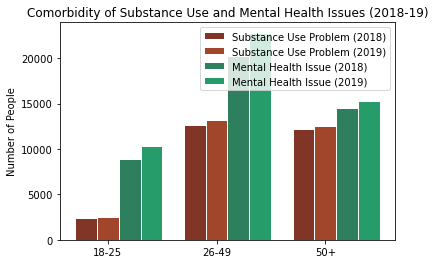

<Figure size 432x288 with 0 Axes>

In [250]:
# Set bar width
barWidth = 0.2

#set height of bar
bar1 = [2367, 12662, 12178] 
bar2 = [2504, 13184, 12512]
bar3 = [8898, 20239, 14512]
bar4 = [10378, 22813, 15297]

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bar1, color='#803526', width=barWidth, 
        edgecolor='white', label='Substance Use Problem (2018)')
plt.bar(r2, bar2, color='#a1452b', width=barWidth, 
        edgecolor='white', label='Substance Use Problem (2019)')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, 
        edgecolor='white', label='Mental Health Issue (2018)')
plt.bar(r4, bar4, color='#279c6b', width=barWidth, 
        edgecolor='white', label='Mental Health Issue (2019)')

# Add xticks on the middle of the group bars
plt.ylabel("Number of People")
plt.title("Comorbidity of Substance Use and Mental Health Issues (2018-19)")

#plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], 
           ['18-25', '26-49', '50+'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

plt.savefig('comorbidity.png')

<AxesSubplot:>

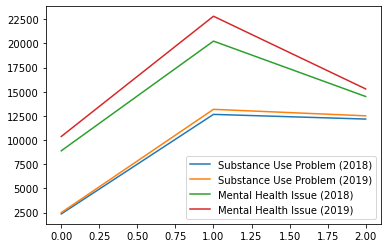

In [251]:
mental_health.plot()

In [252]:
# View the data
marijuana_use_colorado.head()

,OBJECTID,COUNTY,LABEL,Per_Adults_MJ_30day,MJ_Use_Confidence_Interval,MJ_Use_Colorado_Estimate
0,1,LARIMER,Larimer,14.02,County/Regional Estimate 14% (95% C.I.: 11.9 -...,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
1,2,LAS ANIMAS,Las Animas,16.69,County/Regional Estimate 16.7% (95% C.I.: 9.6 ...,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
2,3,FREMONT,Fremont,15.53,County/Regional Estimate 15.5% (95% C.I.: 10.3...,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
3,4,GUNNISON,Gunnison,19.70,County/Regional Estimate 19.7% (95% C.I.: 10.1...,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)
4,5,CONEJOS,Conejos,9.85,County/Regional Estimate 9.9% (95% C.I.: 2.6 -...,State Estimate 14.0% (95% C.I.: 13.5 - 14.5)


The data columns are:

ADMYR: Year of admission
CASEID: Unique identifier for each admission
SERVICES: Service setting at admission
SUB1: Substance use at admission (primary)
SUB2: Substance use at admission (secondary)
SUB3: Substance use at admission (tertiary)
MARFLG: Marijuana/hashish reported at admission
PSYPROB: Co-occurring mental and substance use disorders

In [253]:
colorado_data_dsm.head()

,Unnamed: 0,ADMYR,CASEID,SERVICES,SUB1,SUB2,SUB3,MARFLG,DSMCRIT,PSYPROB
0,706,2018,20181674745,7,5,4,10,1,5,1
1,778,2018,20181598312,7,5,4,10,1,5,1
2,987,2018,20181669968,7,5,1,1,0,5,1
3,1033,2018,20181726629,7,5,1,1,0,5,2
4,1062,2018,20181897353,7,5,1,1,0,5,2


In [254]:
colorado_data_dsm.count()

Unnamed: 0    930495
ADMYR         930495
CASEID        930495
SERVICES      930495
SUB1          930495
SUB2          930495
SUB3          930495
MARFLG        930495
DSMCRIT       930495
PSYPROB       930495
dtype: int64

In [255]:
colorado_df = pd.DataFrame(colorado_data_dsm)
df2_7 = colorado_df.loc[(colorado_df['DSMCRIT'] == 7)]
df2_not_7 = colorado_df.loc[(colorado_df['DSMCRIT'] != 7)]
df2_not_7["ADMYR"]

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
930490    2009
930491    2009
930492    2009
930493    2009
930494    2009
Name: ADMYR, Length: 919729, dtype: int64

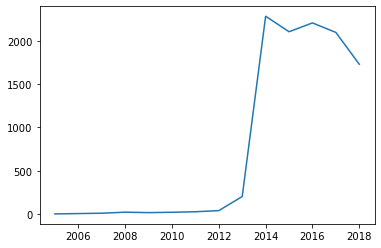

In [256]:
trend_df2_7 =df2_7['ADMYR'].value_counts().sort_index().plot(kind='line');

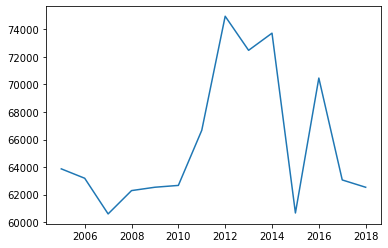

In [257]:
trend_df2_not_7 =df2_not_7['ADMYR'].value_counts().sort_index().plot(kind='line');

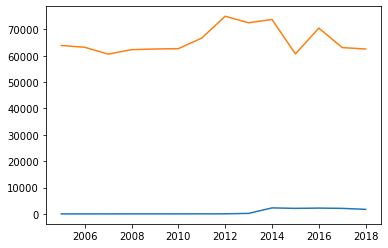

In [258]:
trend_df2_7 =df2_7['ADMYR'].value_counts().sort_index().plot(kind='line');
trend_df2_not_7 =df2_not_7['ADMYR'].value_counts().sort_index().plot(kind='line');

In [307]:
#df_7_agg = df2_7['ADMYR'].groupby('ADMYR').count()
df3_7 = colorado_data_dsm.loc[(colorado_df['DSMCRIT'] == 7)]
df_7_agg = df3_7.groupby('ADMYR').agg(['count'])
df3_not_7 = colorado_data_dsm.loc[(colorado_df['DSMCRIT'] != 7)]
df_not_7_agg = df3_not_7.groupby('ADMYR').agg(['count'])
df_not_7_agg

,Unnamed: 0,CASEID,SERVICES,SUB1,SUB2,SUB3,MARFLG,DSMCRIT,PSYPROB
,count,count,count,count,count,count,count,count,count
ADMYR,,,,,,,,,
2005,63871,63871,63871,63871,63871,63871,63871,63871,63871
2006,63189,63189,63189,63189,63189,63189,63189,63189,63189
2007,60599,60599,60599,60599,60599,60599,60599,60599,60599
2008,62293,62293,62293,62293,62293,62293,62293,62293,62293
2009,62537,62537,62537,62537,62537,62537,62537,62537,62537
2010,62669,62669,62669,62669,62669,62669,62669,62669,62669
2011,66673,66673,66673,66673,66673,66673,66673,66673,66673
2012,74956,74956,74956,74956,74956,74956,74956,74956,74956


In [302]:
df2x = pd.DataFrame(columns=["ADMYR"])
df2x['ADMYR'] = df2_7['ADMYR'].sort_values().unique()
df2x

,ADMYR
0,2005
1,2006
2,2007
3,2008
4,2009
5,2010
6,2011
7,2012
8,2013
9,2014


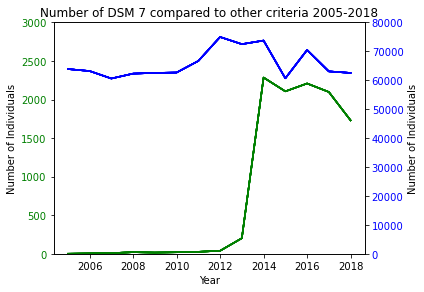

<Figure size 432x288 with 0 Axes>

In [317]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Number of Individuals')
ax1.plot(df2x, df_7_agg, 'green', label='DSM 7 - Cannabis dependence')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Year')
ax1.set_ylim(0,3000)
         
ax2 = ax1.twinx() #instantiate a second axis that shared the same x-axis
ax2.set_ylabel('Number of Individuals')
ax2.plot(df2x, df_not_7_agg, 'blue', label='US')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0,80000)
         
fig.tight_layout()
plt.title("Number of DSM 7 compared to other criteria 2005-2018")
fig1=plt.figure()
plt.show()
fig1.savefig('DSM7vsOther.png')